
<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png" class="center" width="600" >
<h4 align="right">Source: GeeksforGeeks</h4>
## <div style="text-align: center" >Decision Tree with Titanic Dataset</div>
<div style="text-align: center"> Being a part of Kaggle gives me unlimited access to learn, share and grow as a Data Scientist. In this kernel, I want to solve <font color="red"><b>Titanic competition</b></font>, a popular machine learning dataset using <font color="red"><b>Decision Tree Classifier</b></font>. This kernel is a part of my machine learning series articles. If you would like to find out more about other machine learning models, please checkout this <a href="https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic/edit/run/13339359">this</a> kernel. </b> I will also describe how best to evaluate model results along with many other tips. So let's get started.</div>


***
<div style="text-align:center"> If there are any recommendations/changes you would like to see in this notebook, please <b>leave a comment</b>. Any feedback/constructive criticism would be genuinely appreciated. <b>This notebook is always a work in progress. So, please stay tuned for more to come.</b></div>


<div style="text-align:center">If you like this notebook or find this notebook helpful, Please feel free to <font color="red"><b>UPVOTE</b></font> and/or <font color="Blue"><b>leave a comment.</b></font></div><br>

<div style="text-align: center"><b>You can also Fork and Run this kernel from <a href="https://github.com/masumrumi">Github</b></a>
    </div>

### <div style="text-align: center">Stay Tuned for More to Come!!</div>

In [1]:
# Import necessary modules for data analysis and data visualization. 
# Data analysis modules
# Pandas is probably the most popular and important modules for any work related to data management. 
import pandas as pd

# numpy is a great library for doing mathmetical operations. 
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns


## Importing the datasets
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")


## Some other snippit of codes to get the setting right 
## This is so that the chart created by matplotlib can be shown in the jupyter notebook. 
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' ## This is preferable for retina display. 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning
import os ## imporing os
print(os.listdir("../input/")) 

['gender_submission.csv', 'test.csv', 'train.csv']


**> Sample train dataset**

In [2]:
## Take a look at the overview of the dataset. 
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.250,NaN,S
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.500,E40,C
777,778,1,3,"Emanuel, Miss. Virginia Ethel",female,5.0,0,0,364516,12.475,NaN,S
110,111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.000,C110,S
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.500,NaN,S


**> Sample test dataset**

In [3]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C
248,1140,2,"Hold, Mrs. Stephen (Annie Margaret Hill)",female,29.0,1,0,26707,26.0000,NaN,S
121,1013,3,"Kiernan, Mr. John",male,NaN,1,0,367227,7.7500,NaN,Q
17,909,3,"Assaf, Mr. Gerios",male,21.0,0,0,2692,7.2250,NaN,C
331,1223,1,"Dulles, Mr. William Crothers",male,39.0,0,0,PC 17580,29.7000,A18,C


I am going to do all sorts of preparation ( including data munging, preparation, replacing NULL values, standard scaling...dummy variables) on the Titanic dataset to make it ready for the machine learning algorithm. If you would like to find out how I did it step-by-step. Please click <a href="https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic"> here.</a>

In [4]:
## saving passenger id in advance in order to submit later. 
passengerid = test.PassengerId

## Replacing the null values in the Embarked column with the mode. 
train.Embarked.fillna("C", inplace=True)

## Concat train and test into a variable "all_data"
survivers = train.Survived

train.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([train,test], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

all_data.Cabin = [i[0] for i in all_data.Cabin]

with_N = all_data[all_data.Cabin == "N"]

without_N = all_data[all_data.Cabin != "N"]

all_data.groupby("Cabin")['Fare'].mean().sort_values()

def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a
    

##applying cabin estimator function. 
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = all_data[:891]

test = all_data[891:]

# adding saved target variable with train. 
train['Survived'] = survivers

missing_value = test[(test.Pclass == 3) & (test.Embarked == "S") & (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

## dropping the three outliers where Fare is over $500 
train = train[train.Fare < 500]

# Placing 0 for female and 
# 1 for male in the "Sex" column. 
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

# Creating a new colomn with a 
train['name_length'] = [len(i) for i in train.Name]
test['name_length'] = [len(i) for i in test.Name]

def name_length_group(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=45):
        a = 'good'
    else:
        a = 'long'
    return a


train['nLength_group'] = train['name_length'].map(name_length_group)
test['nLength_group'] = test['name_length'].map(name_length_group)

## Here "map" is python's built-in function. 
## "map" function basically takes a function and 
## returns an iterable list/tuple or in this case series. 
## However,"map" can also be used like map(function) e.g. map(name_length_group) 
## or map(function, iterable{list, tuple}) e.g. map(name_length_group, train[feature]]). 
## However, here we don't need to use parameter("size") for name_length_group because when we 
## used the map function like ".map" with a series before dot, we are basically hinting that series 
## and the iterable. This is similar to .append approach in python. list.append(a) meaning applying append on list. 

## cuts the column by given bins based on the range of name_length
#group_names = ['short', 'medium', 'good', 'long']
#train['name_len_group'] = pd.cut(train['name_length'], bins = 4, labels=group_names)

## Title
## get the title from the name
train["title"] = [i.split('.')[0] for i in train.Name]
train["title"] = [i.split(',')[1] for i in train.title]
test["title"] = [i.split('.')[0] for i in test.Name]
test["title"]= [i.split(',')[1] for i in test.title]

#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## train Data
train["title"] = [i.replace('Ms', 'Miss') for i in train.title]
train["title"] = [i.replace('Mlle', 'Miss') for i in train.title]
train["title"] = [i.replace('Mme', 'Mrs') for i in train.title]
train["title"] = [i.replace('Dr', 'rare') for i in train.title]
train["title"] = [i.replace('Col', 'rare') for i in train.title]
train["title"] = [i.replace('Major', 'rare') for i in train.title]
train["title"] = [i.replace('Don', 'rare') for i in train.title]
train["title"] = [i.replace('Jonkheer', 'rare') for i in train.title]
train["title"] = [i.replace('Sir', 'rare') for i in train.title]
train["title"] = [i.replace('Lady', 'rare') for i in train.title]
train["title"] = [i.replace('Capt', 'rare') for i in train.title]
train["title"] = [i.replace('the Countess', 'rare') for i in train.title]
train["title"] = [i.replace('Rev', 'rare') for i in train.title]



#rare_title = ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col']
#train.Name = ['rare' for i in train.Name for j in rare_title if i == j]
## test data
test['title'] = [i.replace('Ms', 'Miss') for i in test.title]
test['title'] = [i.replace('Dr', 'rare') for i in test.title]
test['title'] = [i.replace('Col', 'rare') for i in test.title]
test['title'] = [i.replace('Dona', 'rare') for i in test.title]
test['title'] = [i.replace('Rev', 'rare') for i in test.title]

## Family_size seems like a good feature to create
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

def family_group(size):
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

train.drop(['Ticket'], axis=1, inplace=True)

test.drop(['Ticket'], axis=1, inplace=True)

## Calculating fare based on family size. 
train['calculated_fare'] = train.Fare/train.family_size
test['calculated_fare'] = test.Fare/test.family_size

def fare_group(fare):
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

train['fare_group'] = train['calculated_fare'].map(fare_group)
test['fare_group'] = test['calculated_fare'].map(fare_group)

#train['fare_group'] = pd.cut(train['calculated_fare'], bins = 4, labels=groups)

train.drop(['PassengerId'], axis=1, inplace=True)

test.drop(['PassengerId'], axis=1, inplace=True)


train = pd.get_dummies(train, columns=['title',"Pclass", 'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
test = pd.get_dummies(test, columns=['title',"Pclass",'Cabin','Embarked','nLength_group', 'family_group', 'fare_group'], drop_first=False)
train.drop(['family_size','Name', 'Fare','name_length'], axis=1, inplace=True)
test.drop(['Name','family_size',"Fare",'name_length'], axis=1, inplace=True)

## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
train = pd.concat([train[["Survived", "Age", "Sex","SibSp","Parch"]], train.loc[:,"is_alone":]], axis=1)
test = pd.concat([test[["Age", "Sex"]], test.loc[:,"SibSp":]], axis=1)

## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(train)
completing_age(test);

## create bins for age
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
train['age_group'] = train['Age'].map(age_group_fun)
test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

"""train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)"""

# separating our independent and dependent variable
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]


#age_filled_data_nor = NuclearNormMinimization().complete(df1)
#Data_1 = pd.DataFrame(age_filled_data, columns = df1.columns)
#pd.DataFrame(zip(Data["Age"],Data_1["Age"],df["Age"]))

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = .33, random_state = 0)

# Feature Scaling
## We will be using standardscaler to transform
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
train_x = sc.fit_transform(train_x)
## transforming "test_x"
test_x = sc.transform(test_x)

## transforming "The testset"
test = sc.transform(test)

## changing calculated_fare type
train.calculated_fare = train.calculated_fare.astype(float)

## Using StratifiedShuffleSplit
## We can use KFold, StratifiedShuffleSplit, StratiriedKFold or ShuffleSplit, They are all close cousins. look at sklearn userguide for more info.   
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)

<h1>Decision Tree Classifier</h1>

The idea behind the decision tree is pretty simple. To build a tree, we use a decision tree algorithm called CART. CART stands for Classification and Regression Trees. This means that, the decision tree can be used for both regression and classifications problems. To perform classification or regression, decision trees make sequential, hierarchical decisions about the outcome variable based on the predictor data.

Decision tree works by breaking down the dataset into small subsets. This breaking down process is done by asking questions about the features of the datasets. The idea is to unmix the labels by asking fewer questions necessary. As we ask questions, we are breaking down the dataset into more subsets. Once we have a subgroup with only the unique type of labels, we end the tree in that node. We call this the leaf node. Here is an excellent example of the decision tree. 

<img src="https://cdn-images-1.medium.com/max/1200/1*GgUEazXbr2CYLUsPgdYzDw.png" width="600">

If you think about it, this is sort of like the "20 Questions" game where an individual or group has the opportunity to identify an unknown object by asking a series of up to 20 "yes" or "no" questions. For example, if we want to tie it with this dataset, let's say we are asking to find out whether a certain person in the test dataset survived or not. We may ask a question like, is the person "male" or "female." Let's say the answer is "female." Then the algorithm might ask about the person's Pclass. Let's say the Pclass is 1.

As you can see by inquiring these details about this person we can give a certain percentage with confidence about a person's survival status. If you want to know more how the decision tree does all these mathematically and technically,  you can keep on reading. Otherwise, you can skip to the next section. 

At first, we will add a root node for the tree. All node receives a list of rows from the dataset.  The root node receives the whole dataset. This node then asks true/false questions about one of the features. Based on the answer, we split the dataset into smaller subsets. The number of subsets depends on the unique values of that feature. These subsets then become the input of each child nodes. Each child node then asks another question about a different feature leading to break down further into more subgroups. This process goes on. As we keep reading, one questions beg to be answered. How do we know which questions to ask and when? 

<b>The trick to building an effective tree is to know which questions to ask and when.</b> To find the best possible questions, we need to quantify how much uncertainty is there in a single node and how much a question help to unmix the labels. We can find out how much uncertainty/impurity is there in a single node using a concept called <i>Gini Impurity</i>. We can find out how much a question reduces that uncertainty using a matrix called <i>Information gain.</i> These two combined helps us decide which question to ask in each node. Let's dive into how these are calculated.

<h3>Gini Impurity:</h3>
Gini Impurity ranges between 0 and 1, where a lower value indicates less uncertainty and higher value indicates higher uncertainty. In other words, when we look at the Gini index, we want to look the at the lower value of Gini Index as those are the once produced the most unmixed subsets. [here](https://www.youtube.com/watch?v=7VeUPuFGJHk) is an excellent video about calculating the Gini index.

Gini impurity quantifies our chances of being incorrect if we randomly assign a label to an example in the same set. For example, Let's say there are 5 different mixes with five various names, Our chance of being right is 1/5. So, our chances of being wrong is (1-1/5) = 0.8. So, 0.8 is our Gini Impurity score. 

Here is the equation for Gini score. 

### $$ \text{Gini} = \sum_{i=1}^{classes} p(i\;|\;t)(1 -p(i\;|\;t)) = 1 - \sum_{i=1}^{classes} p(i\;|\;t)^2 $$


#### This part of the kernel is a working progress. Please check back again for future updates.#### 


<h3>Information Gain</h3>
Information gain is basically difference between the Gini Index of the parent note and the <b>weighted</b> average of the child nodes.

Let's get familier with some of the hyperparameters of Decision Tree before we jump right in to the good stuff. 

><b>criterion : string, optional (default=”gini”)</b>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

><b>splitter : string, optional (default=”best”)</b>
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
    
><b>max_depth : int or None, optional (default=None)</b>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

><b>min_samples_split : int, float, optional (default=2)</b>
    The minimum number of samples required to split an internal node:
If int, then consider `min_samples_split` as the minimum number.
If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.
Changed in version 0.18: Added float values for fractions.

><b>min_samples_leaf : int, float, optional (default=1)</b>
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
* If int, then consider `min_samples_leaf` as the minimum number.
* If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.

><b>min_weight_fraction_leaf : float, optional (default=0.)</b>
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

><b>max_features : int, float, string or None, optional (default=None)</b>
The number of features to consider when looking for the best split:
* If int, then consider `max_features` features at each split.
* If float, then `max_features` is a fraction and `int(max_features * n_features)` features are considered at each split.
* If “auto”, then `max_features=sqrt(n_features).`
* If “sqrt”, then `max_features=sqrt(n_features).`
* If “log2”, then `max_features=log2(n_features).`
* If None, then `max_features=n_features.`
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

><b>random_state : int, RandomState instance or None, optional (default=None)</b>
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random.`

><b>max_leaf_nodes : int or None, optional (default=None)</b>
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

><b>min_impurity_decrease : float, optional (default=0.)</b>
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
The weighted impurity decrease equation is the following:
`N_t / N * (impurity - N_t_R / N_t * right_impurity`
                    `- N_t_L / N_t * left_impurity)`
where `N` is the total number of samples, `N_t` is the number of samples at the current node, `N_t_L` is the number of samples in the left child, and `N_t_R` is the number of samples in the right child.
`N`, `N_t`, `N_t_R` and `N_t_L` all refer to the weighted sum, if `sample_weight` is passed.
New in version 0.19.

><b>min_impurity_split : float, (default=1e-7)</b>
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.`Deprecated since version 0.19: min_impurity_split has been deprecated in favor of min_impurity_decrease in 0.19. The default value of min_impurity_split will change from 1e-7 to 0 in 0.23 and it will be removed in 0.25. Use min_impurity_decrease instead.`

><b>class_weight : dict, list of dicts, “balanced” or None, default=None</b>
* Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
* Note that for multioutput (including multilabel) weights should be defined for each class of every column in its own dict. For example, for four-class multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].
* The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
* For multi-output, the weights of each column of y will be multiplied.
* Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

><b>presort : bool, optional (default=False)</b>
Whether to presort the data to speed up the finding of best splits in fitting. For the default settings of a decision tree on large datasets, setting this to true may slow down the training process. When using either a smaller dataset or a restricted depth, this may speed up the training.

### Grid search on Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, StratifiedKFold
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'auto']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(X, y) 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
        

In [6]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 26}
0.8344594594594594
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=26, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [7]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(X,y)

0.8502252252252253

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


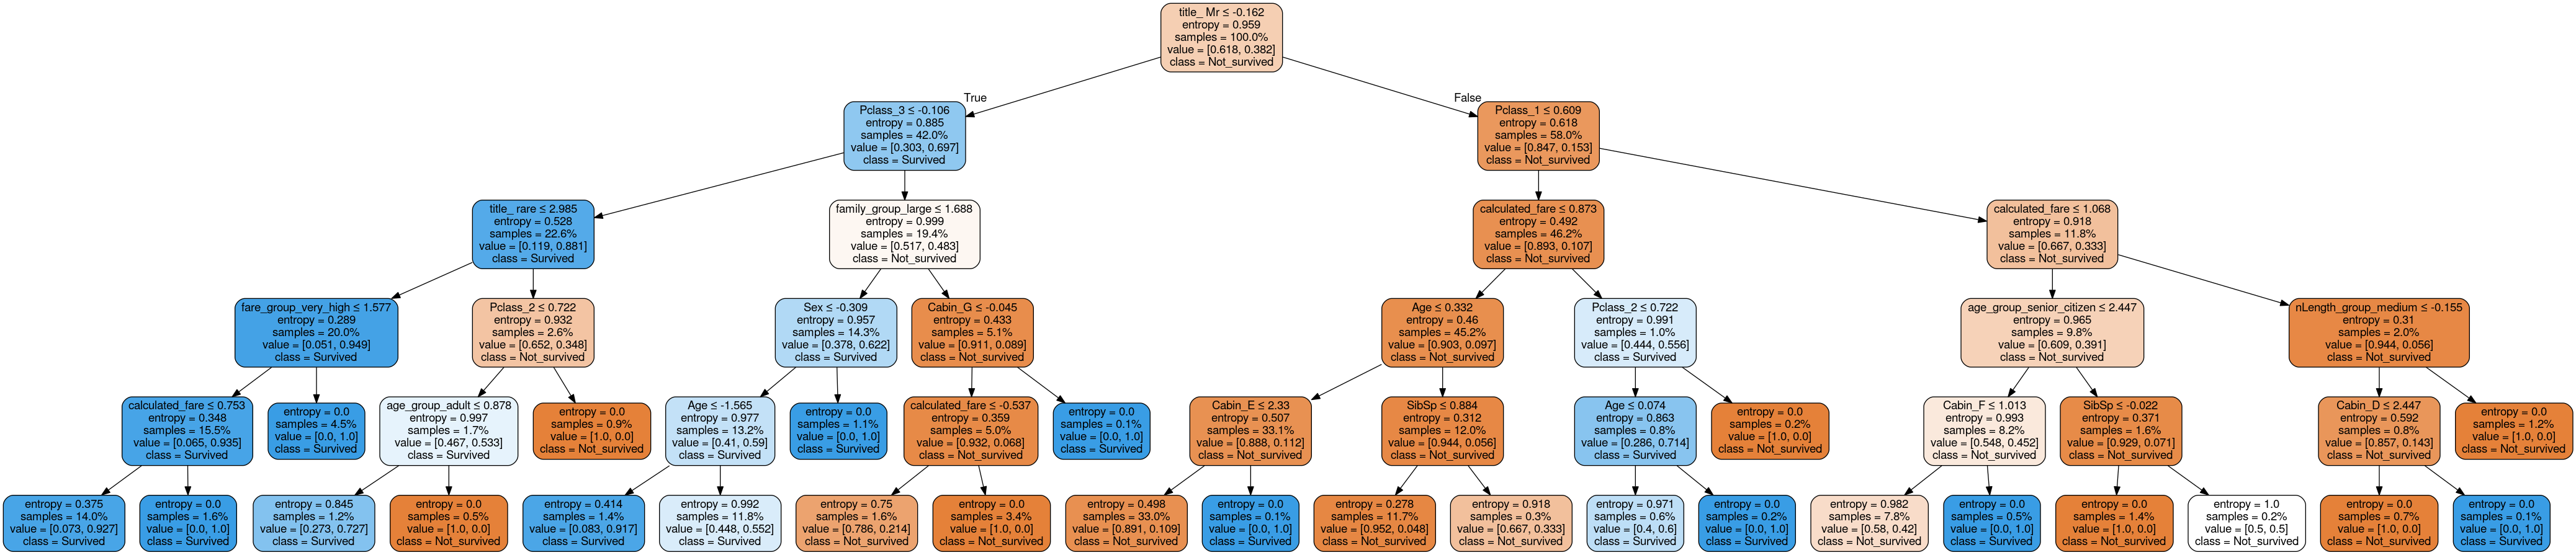

In [8]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
dot_data = StringIO()  
export_graphviz(dectree_grid, out_file=dot_data,  
                feature_names=column_names,  class_names = (["Survived" if int(i) is 1 else "Not_survived" for i in y.unique()]),
                filled=True, rounded=True,
                proportion=True,
                special_characters=True)  
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

## alternative tree
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(decision_tree=dectree_grid, out_file=None, feature_names=column_names, )
#graph = graphviz.Source(dot_data)
#graph.render("house")
#graph

Image(graph.create_png())

Above is a full-grown decision tree. I think having a tree shown like that can help a lot in understanding how the decision tree works.

In [9]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
title_ Mr,0.479298
Pclass_3,0.122908
title_ rare,0.078282
family_group_large,0.072800
calculated_fare,0.051289
Pclass_1,0.048001
Pclass_2,0.022071
Age,0.020206
Sex,0.017016
age_group_senior_citizen,0.014778


These are the top 10 features determined by **Decision Tree** helped classifing the fates of many passenger on Titanic on that night.

<h3>Some advantages of decision trees are:</h3>
* Simple to understand and to interpret. Trees can be visualised.
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

<h3>The disadvantages of decision trees include:</h3>
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called **overfitting**. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem. 
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.
<h4 align="right">Source:Sklearn</h4>
<h4>Resources: </h4> 
* [Let’s Write a Decision Tree Classifier from Scratch - Machine Learning Recipes #8](https://www.youtube.com/watch?v=LDRbO9a6XPU)
* [Super data science](https://www.udemy.com/machinelearning/learn/v4/t/lecture/5732730?start=8)
* [General Assembly](https://generalassemb.ly) 
* [Decision tree playlist](https://www.youtube.com/watch?v=AmCV4g7_-QM&list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO&index=3) 
* [How to calculate Gini Index](https://www.youtube.com/watch?v=7VeUPuFGJHk)
* [Sklearn](https://scikit-learn.org/stable/modules/tree.html)

